In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# took only last two rows as input that will be helpful for making clusters
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


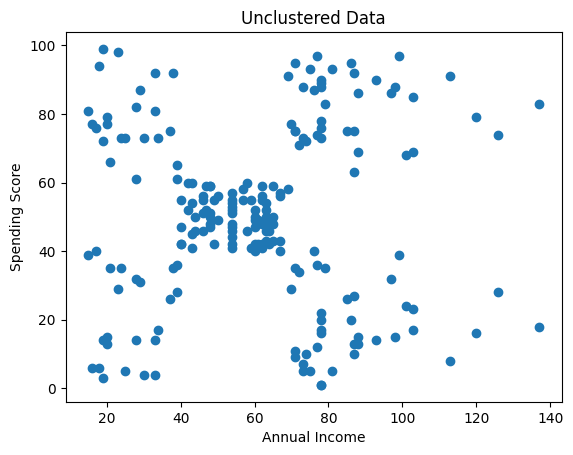

In [6]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [8]:
km = KMeans(n_clusters=6)

In [9]:
km.fit_predict(x)

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0,
       5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [11]:
# SSE depends on number of clusters
km.inertia_

37558.92202302528

In [13]:
sse = []
for k in range(1, 16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [14]:
sse

[269981.28,
 186206.76002258612,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484346,
 36418.74040096809,
 29893.521011933197,
 24475.797015342458,
 25832.0718929528,
 18408.174939595287,
 16585.750165618334,
 16574.25281870907,
 13648.882279847527,
 13852.269122080565]

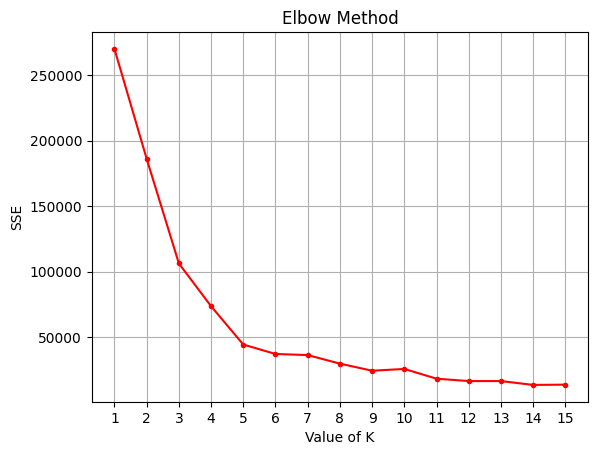

In [17]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker=".", color="red")

In [18]:
# elbow seems to be at k = 5

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silh = []
for k in range(2, 16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

In [21]:
silh

[np.float64(0.3117892685561811),
 np.float64(0.46761358158775435),
 np.float64(0.4931963109249047),
 np.float64(0.5532176107575425),
 np.float64(0.45705720010448403),
 np.float64(0.5270287298101395),
 np.float64(0.4536929490778033),
 np.float64(0.44356765882692756),
 np.float64(0.4288842596205635),
 np.float64(0.4533351726224481),
 np.float64(0.4269031451249127),
 np.float64(0.410599190546398),
 np.float64(0.4317490161064567),
 np.float64(0.43088095474537735)]

<BarContainer object of 14 artists>

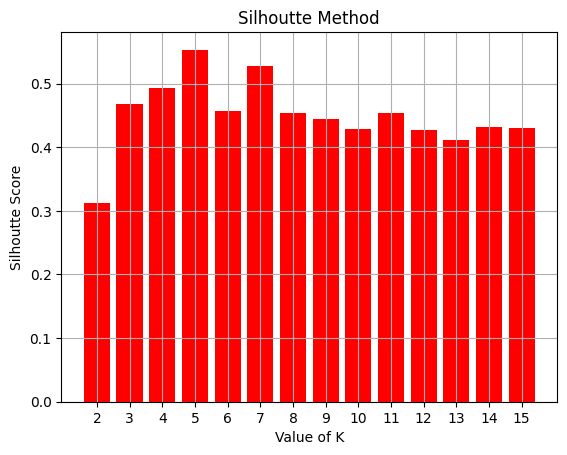

In [22]:
plt.title('Silhoutte Method')
plt.xlabel('Value of K')
plt.ylabel('Silhoutte Score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color="red")

In [23]:
# from graph optimal valu of k is 5

In [25]:
km = KMeans(n_clusters=5, random_state=0)

In [26]:
labels = km.fit_predict(x)

In [27]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [35]:
cent = km.cluster_centers_

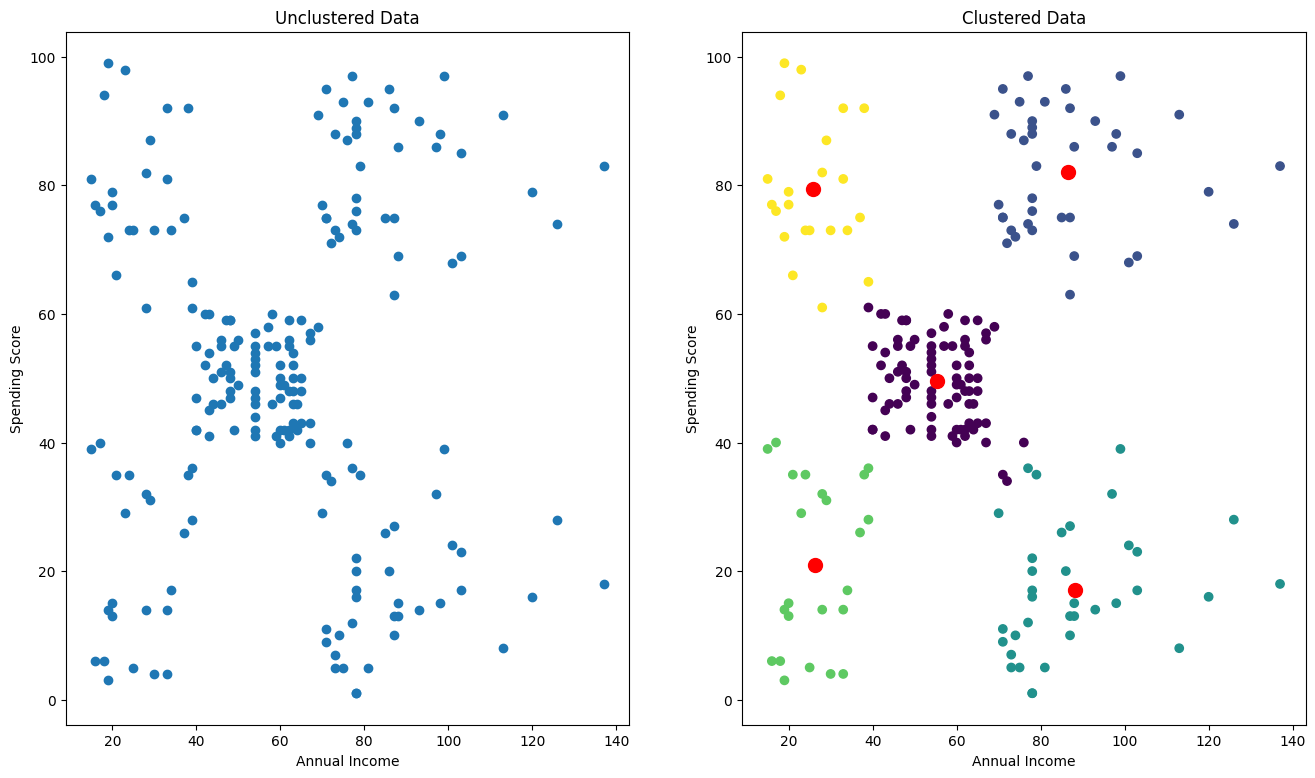

In [37]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

plt.subplot(1, 2, 2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=labels)
plt.scatter(cent[:,0], cent[:,1], s=100, color='red')

In [38]:
agl = AgglomerativeClustering(n_clusters=5)

In [39]:
alabels = agl.fit_predict(x)

In [40]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

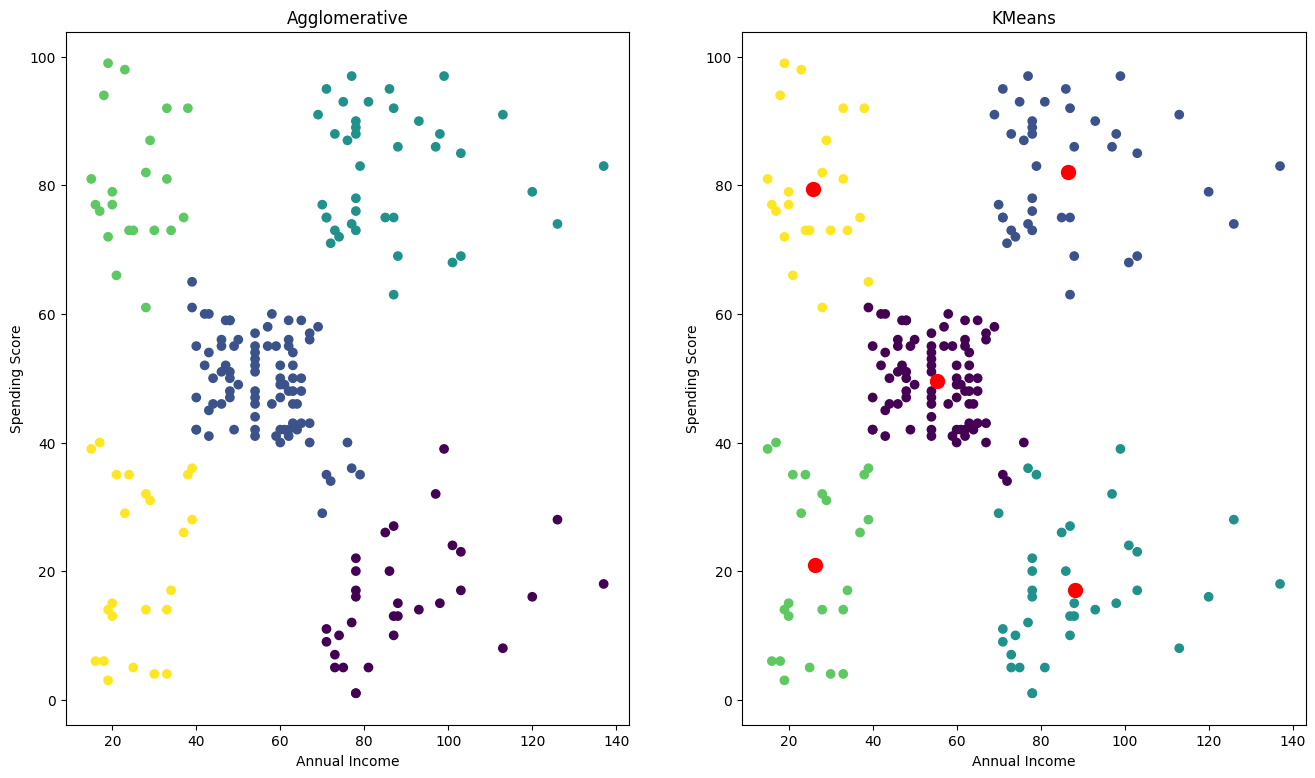

In [41]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.title('Agglomerative')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=alabels)

plt.subplot(1, 2, 2)
plt.title('KMeans')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=labels)
plt.scatter(cent[:,0], cent[:,1], s=100, color='red')

In [43]:
# some points differ on the boundaries  